In [1]:
import nltk
import matplotlib.pyplot as plt

1.☼ Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [2]:
phrase = ['a', 'simple', 'phrase']
phrase + phrase * 2

['a', 'simple', 'phrase', 'a', 'simple', 'phrase', 'a', 'simple', 'phrase']

In [3]:
# print the last two words
phrase[-2:]

['simple', 'phrase']

In [4]:
# change the first word
phrase[0] = 'one'
phrase

['one', 'simple', 'phrase']

In [5]:
# sort alphabetically
sorted(phrase)

['one', 'phrase', 'simple']

2.☼ Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

In [6]:
from nltk.corpus import gutenberg
text = gutenberg.words('austen-persuasion.txt')

In [7]:
print(f'This book has {len(text)} word tokens, {len(set(text))} types (including puctuation), and {len(set(w for w in text if w.isalpha()))} word types (not including punctuation).')

This book has 98171 word tokens, 6132 types (including puctuation), and 6036 word types (not including punctuation).


3.☼ Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [8]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [9]:
brown_fiction = brown.words(categories = 'fiction')
brown_reviews = brown.words(categories = 'reviews')

print(f'Sample fiction text: {brown_fiction[:20]}')
print('-' * 55)
print(f'Sample review text: {brown_reviews[:20]}')

Sample fiction text: ['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', 'to', 'school', '.', 'His', 'parents', 'talked', 'seriously', 'and', 'lengthily', 'to', 'their', 'own', 'doctor', 'and']
-------------------------------------------------------
Sample review text: ['It', 'is', 'not', 'news', 'that', 'Nathan', 'Milstein', 'is', 'a', 'wizard', 'of', 'the', 'violin', '.', 'Certainly', 'not', 'in', 'Orchestra', 'Hall', 'where']


4.☼ Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [10]:
from nltk.corpus import state_union
# state_union.fileids()

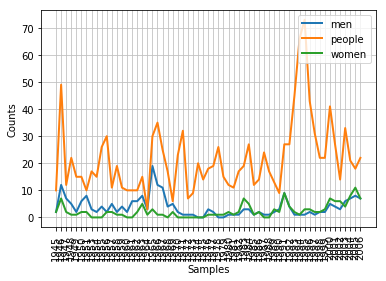

In [11]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in state_union.fileids() 
    for word in state_union.words(fileid) 
    for target in ['men', 'women', 'people'] 
    if word.lower() == target)
cfd.plot()

5.☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(),  part_meronyms(), substance_meronyms(), member_holonyms(),  part_holonyms(), and substance_holonyms().

In [12]:
from nltk.corpus import wordnet as wn

def relations(synset):
    print(f'Member_meronyms: {synset.member_meronyms()}')
    print('-' * 55)
    print(f'Part_meronyms: {synset.part_meronyms()}')
    print('-' * 55)
    print(f'Substance_meronyms: {synset.substance_meronyms()}')
    print('-' * 55)
    print(f'Member_holonyms: {synset.member_holonyms()}')
    print('-' * 55)
    print(f'Part_holonyms: {synset.part_holonyms()}')
    print('-' * 55)
    print(f'Substance_holonyms: {synset.substance_holonyms()}')
    
relations(wn.synset('pig.n.01'))

Member_meronyms: []
-------------------------------------------------------
Part_meronyms: [Synset('pork.n.01'), Synset('trotter.n.01')]
-------------------------------------------------------
Substance_meronyms: [Synset('lard.n.01')]
-------------------------------------------------------
Member_holonyms: [Synset('sus.n.01')]
-------------------------------------------------------
Part_holonyms: []
-------------------------------------------------------
Substance_holonyms: []


In [13]:
relations(wn.synset('water.n.01'))

Member_meronyms: []
-------------------------------------------------------
Part_meronyms: []
-------------------------------------------------------
Substance_meronyms: [Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
-------------------------------------------------------
Member_holonyms: []
-------------------------------------------------------
Part_holonyms: []
-------------------------------------------------------
Substance_holonyms: [Synset('body_of_water.n.01'), Synset('ice.n.01'), Synset('ice_crystal.n.01'), Synset('perspiration.n.01'), Synset('snowflake.n.01'), Synset('tear.n.01')]


In [14]:
relations(wn.synset('neuron.n.01'))

Member_meronyms: []
-------------------------------------------------------
Part_meronyms: [Synset('axon.n.01'), Synset('dendrite.n.01')]
-------------------------------------------------------
Substance_meronyms: []
-------------------------------------------------------
Member_holonyms: []
-------------------------------------------------------
Part_holonyms: [Synset('nervous_system.n.01')]
-------------------------------------------------------
Substance_holonyms: []


6.☼ In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

One problem is that two languages might have words that spell the same, but have different meanings. (For example, 'je' means 'you' in Dutch and 'I' in French.) If this happens, the Spanish translation (added later) overrides the German translation when the dictionary is updated.

To avoid this problem, we can tag the words with their language codes. But this would make the dictionary harder to use, since the person using it would have to know which foreign language the word comes from and the code for that language.

So instead, we will try to keep all possible translations for the same string in a list when we update the dictionary. In addition, we can tag these translations with language codes so users know which language the word is from.

In [15]:
from nltk.corpus import swadesh

def my_update(existing, new, lang_code):
    '''Updates the existing dictionary with new translations while keeping all previous translations.'''
    for key, value in new:
        existing[key] = existing.get(key, []) + [f'{value} ({lang_code})']

fr2en = swadesh.entries(['fr', 'en'])
nl2en = swadesh.entries(['nl', 'en'])
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])

translate = {}
my_update(translate, fr2en, 'fr')
my_update(translate, nl2en, 'nl')
my_update(translate, de2en, 'de')
my_update(translate, es2en, 'es')

print('dire:', translate['dire'])
print('zeggen:', translate['zeggen'])
print('sagen:', translate['sagen'])
print('decir:', translate['decir'])

# Since I don't know Spanish, the following examples are in German and Dutch.
print('hier:', translate['hier'])
print('wie:', translate['wie'])
print('rot:', translate['rot'])

dire: ['say (fr)']
zeggen: ['say (nl)']
sagen: ['say (de)']
decir: ['say (es)']
hier: ['here (nl)', 'here (de)']
wie: ['who (nl)', 'how (de)']
rot: ['rotten (nl)', 'red (de)']


7.☼ According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: [However you advise him, he will probably do as he thinks best.](http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting ["Fossilized prejudices about 'however'"](http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html).


In [16]:
nltk.Text(brown.words(categories = 'government')).concordance('However')

Displaying 25 of 37 matches:
t of the less developed countries , however , such programing is at best inadeq
country programs . In such a case , however , we would encourage the recipient 
national seas . I prefer to speak , however , of Sam Rayburn , the person , rat
in ease of audit time and payment . However , they lend themselves to abuse and
nd other allied matters . In 1942 , however , the nation was at war . Gasoline 
y are doing now . It is not clear , however , whether they are thinking of all 
ue on some boats for tax purposes . However , few are taxed , and the owners an
special districts in Rhode Island . However , a word should be mentioned in reg
 powers . Unlike cities and towns , however , they do not have to submit any fi
tate , city and local governments . However , only Illinois , Oregon , Louisian
as painful as is commonly thought . However , it must be stressed that much dep
cal tax collection year calendars . However , neither of these two cities is on
atures for 

In [17]:
nltk.Text(brown.words(categories = 'religion')).concordance('However')

Displaying 19 of 19 matches:
ghtly grateful . All this has not , however , been an unmixed blessing . The sc
ugh the air . As the play unfolds , however , the audience is subtly brought in
he play , he says at one point : `` However , that experience never raised a do
he pundits seem to have suspected . However , even if the latent demand for dem
ion in the church ( which derives , however , from the heritage of the Greeks r
dition is an enduring achievement . However much we may have to criticize liber
ted country . Since arriving here , however , I have formed a far different rel
ure . Recent research on Irenaeus , however , makes it evident that he does not
rvative has ever to worry about ? ? However , there is a crucial difference bet
ure , come to a fresh realization , however painful it be , that the battle bet
her critics , like the modernists , however , overreached themselves , in claim
lly in connection with divination . However , the wei books were also destroyed
ack door be

It appears that the word is used both ways no matter where it is in the sentence.

8.◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

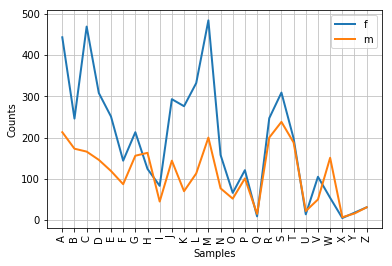

In [18]:
from nltk.corpus import names

cfd = nltk.ConditionalFreqDist(
    (fileid[0], word[0]) 
    for fileid in names.fileids() 
    for word in names.words(fileid))
cfd.plot()

In [19]:
[key for key in cfd['m'].keys() if cfd['m'][key] > cfd['f'][key]]

['H', 'Q', 'U', 'W', 'X']

Initial letters 'H', 'Q', 'U', 'W', 'X' are more frequent for males names. There are, however, less male names than female names in this corpus. To compare relative frequency, we can first divide values in the cfd by the total number of male or female names.

In [20]:
len_male = len(names.words('male.txt'))
len_female = len(names.words('female.txt'))

print(f'There are {len_male} male names and {len_female} female names.')

There are 2943 male names and 5001 female names.


In [21]:
[key for key in cfd['m'].keys() if (cfd['m'][key] / len_male) > (cfd['f'][key] / len_female)]

['B', 'F', 'G', 'H', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', 'Z']

9.◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [22]:
brown_sf = brown.words(categories = 'science_fiction')
brown_romance = brown.words(categories = 'romance')
print(f'There are {len(brown_sf)} word tokens and {len(set(brown_sf))} types in the science fiction category. Lexical diversity score is {len(set(brown_sf)) / len(brown_sf)}.')
print(f'There are {len(brown_romance)} word tokens and {len(set(brown_romance))} types in the romance category. Lexical diversity score is {len(set(brown_romance)) / len(brown_romance)}.')

There are 14470 word tokens and 3233 types in the science fiction category. Lexical diversity score is 0.22342778161713892.
There are 70022 word tokens and 8452 types in the romance category. Lexical diversity score is 0.12070492131044529.


In [23]:
brown_sf_Text = nltk.Text(brown_sf)
brown_romance_Text = nltk.Text(brown_romance)

In [24]:
brown_sf_Text.concordance('space')

Displaying 7 of 7 matches:
e , Sigmen City would blaze out into space . And , somewhere in that enormous l
adne was going to be hotter than any space cruiser man had ever dreamed of . Bu
bove them , the sky was the black of space , or the almost equal black of the w
er the years , he had had buddies in space in whom he thought he could confide 
nto the maintenance and running of a space ship . For Helva was destined to be 
basic alien psychology , philology , space history , law , traffic , codes : al
re unclaimed square miles of seating space around them , but he appreciated the


In [25]:
brown_romance_Text.concordance('space')

Displaying 7 of 7 matches:
 head undulated gradually , covering space , to come straining beneath the taut
ng much happier already , clearing a space on the table and chattering about ho
Alexander broke in . `` There is not space to hold or force to guard any increa
st enough to orbit but not make deep space . I read the Tropic of Capricorn and
d himself against the borders of the space that had to separate them . Carrozza
n the bureau and spent six months in space : hollow eyes , hollow cheeks , holl
r people's eating out and not enough space in the units . And where was the thi


In [26]:
print('Similar words in science fiction:')
brown_sf_Text.similar('space')

Similar words in science fiction:
it ship range holies joke scout focus


In [27]:
print('Similar words in romance:')
brown_romance_Text.similar('space')

Similar words in romance:
man have one hand thing stop part fleas seemed waiting light sign
finger going things trying world wish grip need


10.◑ Read the BBC News article: [UK's Vicky Pollards 'left behind'](http://news.bbc.co.uk/1/hi/education/6173441.stm). The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on [LanguageLog](http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html)

In [28]:
def count_to_a_third(text):
    target = len(text) / 3
    
    word_types = []
    total_freq = 0
    
    for word, freq in nltk.FreqDist(text).most_common():
        word_types.append(word)
        total_freq += freq
        if total_freq >= target:
            break
    return word_types

In [29]:
brown_news = brown.words(categories = 'news')
news_words = count_to_a_third(brown_news)
print(len(news_words), news_words)

19 ['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'The', 'that', '``', 'is', 'was', "''", 'on', 'at', 'with', 'be']


In [30]:
romance_words = count_to_a_third(brown_romance)
print(len(romance_words), romance_words)

16 [',', '.', 'the', 'and', 'to', 'a', 'of', '``', "''", 'was', 'I', 'in', 'he', 'had', '?', 'her']


Nineteen/sixteen types account for a third of all word tokens in the Brown news/romance text. They are all stopwords and punctuation symbols.

We can also modify the above function to exclude punctuation symbols.

In [31]:
def count_only_words(text):
    target = len([word for word in text if word.isalpha()]) / 3
    
    word_types = []
    total_freq = 0
    
    for word, freq in nltk.FreqDist(text).most_common():
        if word.isalpha():
            word_types.append(word)
            total_freq += freq
            if total_freq >= target:
                break
    return word_types

In [32]:
news_words = count_only_words(brown_news)
print(len(news_words), news_words)

29 ['the', 'of', 'and', 'to', 'a', 'in', 'for', 'The', 'that', 'is', 'was', 'on', 'at', 'with', 'be', 'by', 'as', 'he', 'said', 'his', 'will', 'it', 'from', 'are', 'an', 'has', 'had', 'who', 'have']


In [33]:
sf_words = count_only_words(brown_sf)
print(len(sf_words), sf_words)

28 ['the', 'of', 'to', 'and', 'a', 'was', 'in', 'had', 'he', 'it', 'that', 'I', 'not', 'his', 'for', 'on', 'you', 'be', 'would', 'The', 'her', 'with', 'as', 'have', 'all', 'were', 'him', 'but']


In [34]:
from nltk.corpus import nps_chat
chat_words = count_only_words(nps_chat.words())
print(len(chat_top_words), chat_top_words)

27 ['JOIN', 'PART', 'lol', 'to', 'i', 'the', 'you', 'I', 'a', 'hi', 'me', 'is', 'in', 'ACTION', 'and', 'it', 'that', 'hey', 'my', 'of', 'u', 'for', 'on', 'what', 'here', 'are', 'not']


11.◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [35]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories = genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
pronouns = ['I', 'we', 'you', 'he', 'she', 'it', 'they']
cfd.tabulate(conditions = genres, samples = pronouns)

                   I   we  you   he  she   it they 
           news  179   77   55  451   42  363  205 
       religion  155  176  100  137   10  264  115 
        hobbies  154  100  383  155   21  476  177 
science_fiction   98   30   81  139   36  129   53 
        romance  951   78  456  702  496  573  168 
          humor  239   32  131  146   58  162   70 


12.◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [36]:
from nltk.corpus import cmudict

prondict = cmudict.dict()
print(f'Number of distinct words: {len(prondict)}')

count = len([word for word in prondict if len(prondict[word]) > 1])
print(f'Fraction of words with more than one possible pronunciation: {100*count/len(prondict)}%')

Number of distinct words: 123455
Fraction of words with more than one possible pronunciation: 7.485318537118788%


13.◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [37]:
all_synsets = len(list(wn.all_synsets('n')))
no_hyponyms = sum(not syn.hyponyms() for syn in wn.all_synsets('n'))
print(f'{100 * no_hyponyms / all_synsets}% of noun synsets have no hyponyms')

79.67119283931072% of noun synsets have no hyponyms


14.◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [38]:
def supergloss(synset):
    return [synset.definition()] + [s.definition() for s in synset.hypernyms()] + [s.definition() for s in synset.hyponyms()]

supergloss(wn.synset('piano.n.01'))

['a keyboard instrument that is played by depressing keys that cause hammers to strike tuned strings and produce sounds',
 'a musical instrument that is played by means of a keyboard',
 'a musical instrument in which the sound is produced by one object striking another',
 'a musical instrument in which taut strings provide the source of sound',
 'a piano with the strings on a horizontal harp-shaped frame; usually supported by three legs',
 'a mechanically operated piano that uses a roll of perforated paper to activate the keys',
 'a piano with a vertical sounding board']

15.◑ Write a program to find all words that occur at least three times in the Brown Corpus.

In [39]:
def frequent_words(text, n = 3):
    '''Find all words that occur at least n times in text. Case sensitive.'''
    fd = nltk.FreqDist(text)
    return [word for word in fd if fd[word] >= n]

frequent_words(brown.words())

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'jury',
 'further',
 'in',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'deserves',
 'praise',
 'and',
 'thanks',
 'Atlanta',
 'for',
 'manner',
 'was',
 'conducted',
 'term',
 'been',
 'charged',
 'by',
 'Superior',
 'Court',
 'Judge',
 'to',
 'investigate',
 'reports',
 'possible',
 'won',
 'Ivan',
 'Allen',
 'Jr.',
 'Only',
 'a',
 'relative',
 'handful',
 'such',
 'received',
 'considering',
 'widespread',
 'interest',
 'number',
 'voters',
 'size',
 'this',
 'city',
 'it',
 'did',
 'find',
 'many',
 "Georgia's",
 'registration',
 'laws',
 'are',
 'outmoded',
 'or',
 'inadequate',
 'often',
 'ambiguous',
 'It',
 'recommended',
 'legislators',
 'act',
 'have',
 'these',
 'studied'

16.◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [40]:
def vocab_diversity(text):
    return len(set(text)) / len(text)

for c in brown.categories():
    print(f'{c}: {vocab_diversity(brown.words(categories = c))}')

adventure: 0.1279743878169075
belles_lettres: 0.10642071451679992
editorial: 0.16054152327770924
fiction: 0.1358194136199042
government: 0.11667641228232811
hobbies: 0.14493897625842492
humor: 0.23125144042406084
learned: 0.09268890745953554
lore: 0.13148804612915801
mystery: 0.12212912592488936
news: 0.14314696580941583
religion: 0.1617553745018909
reviews: 0.21192020440251572
romance: 0.12070492131044529
science_fiction: 0.22342778161713892


The 'learned' genre has the lowest diversity.

17.◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [41]:
from nltk.corpus import stopwords

def most_frequent_not_stopwords(text, n = 50):
    '''Finds the n most frequently occurring words that are not stopwords.'''
    count = 0
    ans = []
    fd = nltk.FreqDist(text)
    
    for word, _ in fd.most_common():
        if count >= 50:
            break
        if word.isalpha() and not word.lower() in stopwords.words('English'):
            ans.append(word)
            count += 1
    return ans

print('The 50 most frequently occuring words of Brown science fiction that are not stopwords are:')
print(most_frequent_not_stopwords(brown_sf))

The 50 most frequently occuring words of Brown science fiction that are not stopwords are:
['would', 'could', 'said', 'one', 'time', 'Ekstrohm', 'Helva', 'Mercer', 'long', 'like', 'know', 'Hal', 'Mike', 'people', 'ship', 'back', 'Jack', 'man', 'make', 'years', 'Earth', 'made', 'never', 'mind', 'see', 'first', 'course', 'head', 'much', 'Ryan', 'without', 'going', 'felt', 'light', 'little', 'way', 'good', 'get', 'might', 'knew', 'thought', 'turned', 'among', 'take', 'still', 'well', 'got', 'Hesperus', 'ever', 'many']


18.◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [42]:
def bigrams_without_stopwords(text, n = 50):
    '''Prints the n most frequent bigrams without stopwords.'''
    count = 0
    bigrams_fd = nltk.FreqDist(nltk.bigrams(text))
    
    for bi, _ in bigrams_fd.most_common():
        if count >= 50:
            break
        if bi[0].isalpha() and bi[1].isalpha() and not (bi[0].lower() in stopwords.words('English') or bi[1].lower() in stopwords.words('English')):
            print(f'{bi[0]} {bi[1]}', end = ', ')
            count += 1

bigrams_without_stopwords(brown_news)

New York, per cent, United States, last year, White House, last week, home runs, President Kennedy, last night, years ago, San Francisco, Premier Khrushchev, Kansas City, high school, Los Angeles, United Nations, New Orleans, High School, vice president, sales tax, American Catholic, El Paso, first time, Rules Committee, Air Force, tax bill, two years, would like, Rhode Island, social security, weeks ago, home run, police said, higher education, collective bargaining, farm equipment, jury said, three years, million dollars, President said, Soviet Union, Viet Nam, one time, civil defense, Hawksley said, home rule, Country Club, New Jersey, American League, White Sox, 

19.◑ Write a program to create a table of word frequencies by genre, like the one given in [1](https://www.nltk.org/book/ch02.html#sec-extracting-text-from-corpora) for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

In [43]:
brown_cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories = genre))

def table(words):
    brown_cfd.tabulate(samples = words)
    
words = ['laugh', 'smile', 'chuckle', 'roar', 'shout', 'cry']
table(words)

                  laugh   smile chuckle    roar   shout     cry 
      adventure       3       9       0       7       1       5 
 belles_lettres       1       9       0       1       0       6 
      editorial       0       1       0       0       0       2 
        fiction       9       4       0       0       4       9 
     government       0       0       0       0       0       0 
        hobbies       0       0       0       0       0       0 
          humor       2       4       2       0       0       2 
        learned       0       1       0       0       0       0 
           lore       1       2       1       3       0       9 
        mystery       3      13       0       0       2       1 
           news       0       1       0       2       0       3 
       religion       2       1       0       0       0       0 
        reviews       1       2       1       0       0       0 
        romance       6      11       1       0       0      10 
science_fiction       0  

20.◑ Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [44]:
def word_freq(word, section):
    return nltk.FreqDist(brown.words(categories = section))[word]

word_freq('president', 'government')

27

In [45]:
word_freq('president', ['romance', 'humor'])

10

21.◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [46]:
def num_syllables(word):
    '''Finds the number of syllables in a word in the cmu dictionary.'''
    return sum(phone[-1].isdigit() for phone in prondict[word][0])
        
def min_syllables(text):
    '''Estimate the number of syllables contained in a text.'''
    ans = 0
    other_words = set()
    for word in text:
        # if a word is in the cmu dictionary, return the number of syllables in its first pronounciation
        if word.lower() in prondict:
            ans += num_syllables(word.lower())
        # if a word is not in the dictionary, add it to the set of words not included in the estimation.
        else:
            other_words.add(word)
    return ans, other_words

min_syllables(brown.words(categories = 'science_fiction'))

(16616,
 {'!',
  "'",
  "''",
  '(',
  ')',
  ',',
  '--',
  '.',
  '10',
  '138',
  '25',
  '4',
  '5',
  '573',
  '99.1',
  ':',
  ';',
  '?',
  'ABC',
  'Absent-minded',
  'Aj',
  'Altairians',
  "Angel's",
  "B'dikkat",
  "B'dikkat's",
  'BCD',
  'CB',
  'Candide',
  'Capellan',
  "Digby's",
  'Earth-week',
  'Earth-weeks',
  'Earthmen',
  "Earthmen's",
  'Ekstrohm',
  "Ekstrohm's",
  'ExPe',
  'First-Born',
  'Fosterite',
  'Fosterites',
  'French-Canadians',
  "Grandmothers'",
  'Haijac',
  'Hawaiian-Americans',
  'Helva',
  "Helva's",
  'Hesperus',
  "Hesperus'",
  'Holies',
  'I.Q.',
  'Icelandic-speaking',
  'Jubal',
  "Jubal's",
  "L'Unita",
  'Macneff',
  "Mercer's",
  'Nernst',
  'Nogol',
  'Nozze',
  'Ozagen',
  'Ozagenians',
  'Pornsen',
  'Power-Seek',
  'Rig-Veda',
  'Sandalphon',
  'Shayol',
  "Short's",
  'Siddo',
  'Sigmen',
  'Sturch',
  'Urielites',
  'Venusians',
  'Yancey-6',
  'Yancy-6',
  '``',
  'absentmindedly',
  'anesthetically',
  'beasties',
  'birthed',


In [47]:
# Based on the result above, improve the function by including words not in the cmudict.
# Estimate the number of syllables in these words by counting groups of vowels.
# This method should be more accurate than the one above, but it fails for numbers (e.g.'10'), acronyms (e.g.'BCD'), 
# and some other words (e.g. 'Candide', 'absentmindedly').
import re

def new_num_syllables(word):
    if word in prondict:
        return sum(phone[-1].isdigit() for phone in prondict[word][0])
    else:
        return len(re.findall('[aeiou]+', word))

def estimate_syllables(text):
    return sum(new_num_syllables(word.lower()) for word in text)

estimate_syllables(brown.words(categories = 'science_fiction'))

17593

22.◑ Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [48]:
def hedge(text):
    ans = []
    n_likes = len(text) // 3
    for i in range(n_likes):
        ans += text[3*i:3*(i+1)] + ['like']
    try:
        ans += text[3*n_likes:]
    except:
        return ans
    return ans

example = ['0', '1', '2', '3', '4', '5', '6', '7']
hedge(example)

['0', '1', '2', 'like', '3', '4', '5', 'like', '6', '7']

23.★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
 1. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
 1. Generate random text, e.g., using  random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

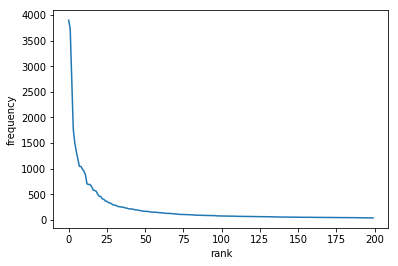

In [49]:
def zipf_plot(fd):
    word_rank = []
    word_freq = []
    for i, t in enumerate(fd.most_common(200)):
        word_rank.append(i)
        word_freq.append(t[1])
    plt.plot(word_rank, word_freq)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.show()

zipf_plot(brown_cfd['romance'])

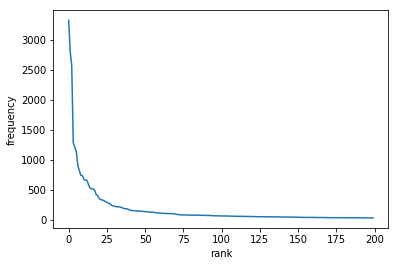

In [50]:
zipf_plot(brown_cfd['mystery'])

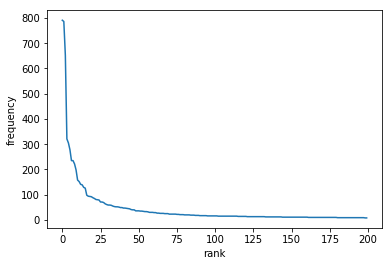

In [51]:
zipf_plot(brown_cfd['science_fiction'])

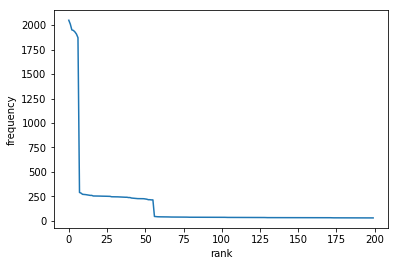

In [52]:
import random

random_text = []
for _ in range(1000000):
    random_text.append(random.choice('abcdefg '))
random_text = nltk.Text((''.join(random_text)).split())
random_fd = nltk.FreqDist(random_text)

zipf_plot(random_fd)

Zipf's law does not apply to randomly generated text.

24.★ Modify the text generation program in [2.2](https://www.nltk.org/book/ch02.html#code-random-text) further, to do the following tasks:
 1. Store the n most likely words in a list words then randomly choose a word from the list using  random.choice(). (You will need to import random first.)
 1. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
 1. Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [53]:
def generate_model(text, num = 15, n = 100):
    words = [word for word, _ in nltk.FreqDist(text).most_common(n)]
    for i in range(num):
        word = random.choice(words)
        print(word, end = ' ')

generate_model(brown_sf)

an own B'dikkat Ekstrohm me ? He all his they it . their time up 

In [54]:
generate_model(brown_news + brown_romance)

me which do he home of as but its at all would Mrs. '' -- 

Not at all intelligible since the words are randomly chosen.

25.★ Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [55]:
from nltk.corpus import udhr

def find_language(string):
    '''Returns a list of languages that have the input string as a word. Case sensitive.'''
    ans = []
    for lang in udhr.fileids():
        if lang.endswith('Latin1') and string in udhr.words(lang):
            ans.append(lang[:-7])
    return ans

find_language('rights')

['English', 'NigerianPidginEnglish', 'TokPisin']

This function is case sensitive. To increase the number of matches, check if `string.lower()` is in `set(word.lower() for word in udhr.words(lang))`

26.★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using  wn.all_synsets('n').

In [56]:
num_hypo = 0
sum_hypo = 0
for syn in wn.all_synsets('n'):
    len_hypo = len(syn.hyponyms())
    if len_hypo > 0:
        num_hypo += 1
        sum_hypo += len_hypo
        
print('Average number of hyponyms over noun synsets that have hyponyms:')
print(sum_hypo / num_hypo)
print('Average number of hyponyms over all noun synsets:')
print(sum_hypo / len(list(wn.all_synsets('n'))))

Average number of hyponyms over noun synsets that have hyponyms:
4.543820763194153
Average number of hyponyms over all noun synsets:
0.9237045606770992


27.★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [57]:
def average_polysemy(part):
    seen = set()
    num_poly = 0
    for syn in wn.all_synsets(part):
        for word in syn.lemma_names():
            if not word in seen:
                seen.add(word)
                num_poly += len(wn.synsets(word, part))
    return num_poly / len(seen)

In [58]:
parts = ['n', 'v', 'a', 'r']
for part in parts:
    print(f'{part}: {average_polysemy(part)}')

n: 1.2833560159282222
v: 2.1866273523545225
a: 1.4104837960813446
r: 1.2532916759651864


28.★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [59]:
samples = 'car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string'
samples = samples.split(', ')

def score(pair):
    '''Returns path_similarity score of a pair "left-right".'''
    p = pair.split('-')
    return wn.synset(f'{p[0]}.n.01').path_similarity(wn.synset(f'{p[1]}.n.01'))

# initiate a list 'comp' to store pairs, their path_similarity score, and their ranks in the reference.
comp = []
for r, pair in enumerate(samples):
    comp.append([pair, score(pair), r])
comp.sort(key = lambda x: (x[1], -x[2]), reverse = True)

# append new ranking to the list
for i, item in enumerate(comp):
    item.append(i)

comp

[['car-automobile', 1.0, 0, 0],
 ['midday-noon', 1.0, 7, 1],
 ['coast-shore', 0.5, 4, 2],
 ['tool-implement', 0.5, 12, 3],
 ['boy-lad', 0.3333333333333333, 3, 4],
 ['journey-voyage', 0.25, 2, 5],
 ['coast-hill', 0.2, 20, 6],
 ['shore-woodland', 0.2, 22, 7],
 ['monk-slave', 0.2, 23, 8],
 ['lad-wizard', 0.2, 25, 9],
 ['magician-wizard', 0.16666666666666666, 6, 10],
 ['lad-brother', 0.14285714285714285, 14, 11],
 ['gem-jewel', 0.125, 1, 12],
 ['asylum-madhouse', 0.125, 5, 13],
 ['brother-monk', 0.125, 13, 14],
 ['monk-oracle', 0.125, 17, 15],
 ['bird-crane', 0.1111111111111111, 11, 16],
 ['cemetery-woodland', 0.1111111111111111, 18, 17],
 ['glass-magician', 0.1111111111111111, 27, 18],
 ['crane-implement', 0.1, 15, 19],
 ['food-fruit', 0.09090909090909091, 9, 20],
 ['coast-forest', 0.09090909090909091, 24, 21],
 ['chord-smile', 0.09090909090909091, 26, 22],
 ['furnace-stove', 0.07692307692307693, 8, 23],
 ['forest-graveyard', 0.07142857142857142, 21, 24],
 ['bird-cock', 0.0625, 10, 25],
 

In [61]:
total_abs_diff = sum(abs(x[2] - x[3]) for x in comp)
avg_abs_diff = total_abs_diff / len(comp)
print(f'Total absolute difference between two rankings systems is {total_abs_diff}.')
print(f'Average absolute difference is {avg_abs_diff}.')

Total absolute difference between two rankings systems is 202.
Average absolute difference is 6.733333333333333.
